<hr></hr>
<center> <font size="6"> <b> Salesian Polytechnic University</b></font></center>
<hr></hr>  

<h3 id="simulacion">Simulation</h3>

<h2 id="laintegraciondemontecarlo">The integration of Monte Carlo</h2>

<h5 id="realizadoporsoavanessaamendanomurilloychristiandutan">Composed of: Soa Vanessa Amendano Murillo and Christian Dutan</h5>


<h3 id="montecarlo">Monte Carlo</h3>

<p>Method that implements random numbers, whether finite or infinite, of which its probabilistic distribution is known through the numerical calculation of mathematical expressions.</p>


<h4 id="probabilitydistribution">Probability distribution</h4>

<p>Therefore, it is enough to associate it with one or more X numbers (random variables) to each result of the experiment.</p>

<p>If we say that a random variable has a discrete distribution, we obtain the probability distribution function.</p>

<img src="2.PNG" /> </div>

<img src="3.PNG" /> </div>

<p>Where the discrete values are k ranging from 0 to n</p>

<img src="4.PNG" /> </div>

<p>It is considered continuous distribution if in the function there exists f with integral total unity, such that for all x1 &lt;= x2</p>

<p>Where f is the probability density, leaving the cumulative distribution function</p>

<img src="6.PNG" /></div>

<h4 id="mostcommondistributions">Most common distributions</h4>

<img src="7.PNG"/> </div>


<h4 id="examplesinclass">EXAMPLES IN CLASS:</h4>

In [1]:
import math
import random

class Montecarlo:
    
    def __init__(self):
        print("Inicializa...")
        
    
    def fy(self,ri,a,b):
        res = math.pow((b-a)*ri+a,2.0)+\
            math.sqrt((b-a)*ri+a)
        return res
    
    def integral(self,a,b,N):
        suma = 0.0
        ri = 0.0
        for i in range(N):
            ri = random.random()
            suma+=self.fy(ri,a,b)
            
        res = ((b-a)/N)*suma
        return res
    
if __name__=="__main__":
    monte=Montecarlo()
    res = monte.integral(10.0,27.0,100000)
    print("Res: ",res)


Inicializa...
Res:  6279.551511956629


In [2]:
import math
import random
import numpy as np

class IntegralMontecarlo:
    
    def __init__(self):
        print('Montecarlo')
        
    
    def hy(self, ui, a, b):
        temp1 = np.power(ui*(b-a)+a, 4.0)
        temp2 = 4*(ui*(b-a)+a)+2
        suma = np.sum(temp1+temp2)
        return suma*(b-a)/float(len(ui))
    
    def integrar(self,a, b, n):
        ui = []
        for i in range(n):
            ui.append(random.random())
            
        res = self.hy(np.array(ui), a, b)
        return res
        
if __name__=="__main__":
    integral = IntegralMontecarlo()
    res = integral.integrar(-1.0, 5, 10000)
    print('Res:     {%.2f}' % res)
        


Montecarlo
Res:     {690.00}


<h3 id="monitoringvariance">Monitoring variance</h3>

<p>This allows us to see how many iterations are needed for it to converge, for this you need to have confidence intervals for example trying to estimate the next function.</p>

f (x) = x \ cos 7x + \ sin 13x, \ \ 0 \ le x \ le 1

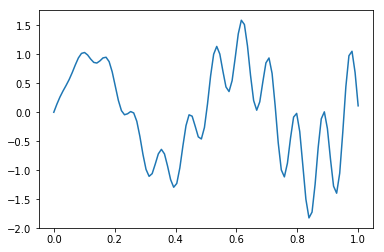

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
 
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
 

<p>estimate of the integration of monte carlo</p>

In [9]:
n = 100
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

-0.048304111000307765

<p>Example of use of multiple independent sequences in the monitoring of convergence within a sample of 1 to 100 where the red line shows the sample route and blue line indicates the percentiles</p>

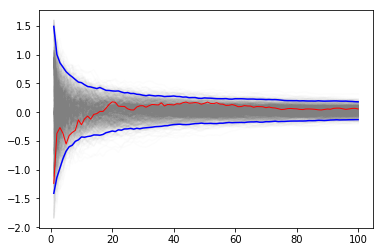

In [10]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

<p>example of use of bootstrap to monitor convergence in 1000 interactions the red line shows the sample route and blue line indicates the percentiles</p>

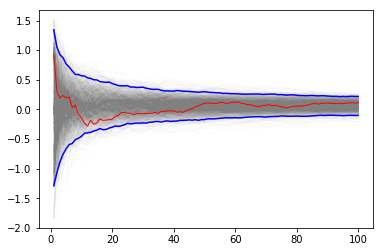

In [11]:

xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

<h3 id="variancereduction">Variance reduction</h3>

<p>the variance with independent samples is</p>

<img src="9.PNG"/> </div>

<p>where a change of variance using techniques that reduce and improve accuracy without increasing the number of samples such as:</p>

<ul>
<li>Importance sampling</li>

<li>Stratified Sampling</li>

<li>Control Variables</li>

<li>Antithetical Variables</li>
</ul>

<h3 id="antitheticalvariables">Antithetical variables</h3>

<p>the first is to choose two sets of random numbers where they have the same distribution being negatively correlated.</p>

<img src="8.PNG"/> </div>


In [12]:

def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

from sympy import sin, cos, symbols, integrate

x = symbols('x')
sol = integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(16)
sol

0.02025493910239406

<p>Vanilla from Monte Carlo where the variance uses the first half of u complementing with 1-u</p>

In [13]:
n = 10000
u = np.random.random(n)
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.029386959257025787, 0.4508539921283871)

<p>being negatively correlated the sum of the variance will be lower</p>

In [14]:
u = np.r_[u[:n//2], 1-u[:n//2]]
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.01816584340258615, 0.1031400632333170)

<h3 id="quasimontecarlo">Quasi-Monte Carlo</h3>

<p>clustering reduces precision where nearby points provide little information where strategic sampling is planned using random numbers to fill that space efficiently reducing low discrepancy sequences</p>

<p>In the following example, the pseudorandom numbers are determined with the Mersenne Twister algorithm, where it is generated with almost uniform distribution numbers in large periods. Depes based on the Monte Carlo model will calculate the volume of as a probability, in order to approximate certain expressions through guessing them with the help of the number of random numbers to calculate where it is done with various techniques such as the reduction of variance</p>

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [16]:
random.random()

0.49420568181919666

In [17]:

for i in range(5):
    print(random.random())

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


In [18]:
random.seed(1984) 
for i in range(7):
    print(random.random()) 

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


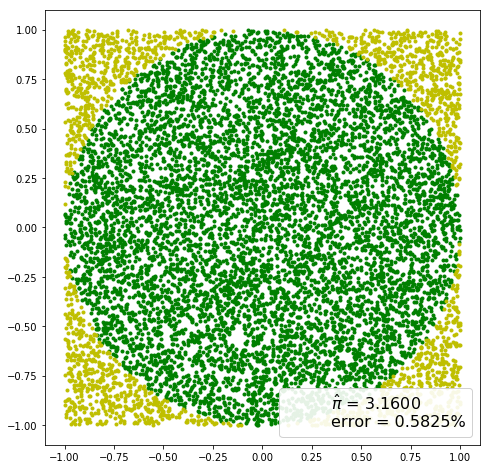

In [19]:
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    
    plt.plot(x[interior], y[interior], 'g.')
    plt.plot(x[exterior], y[exterior], 'y.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

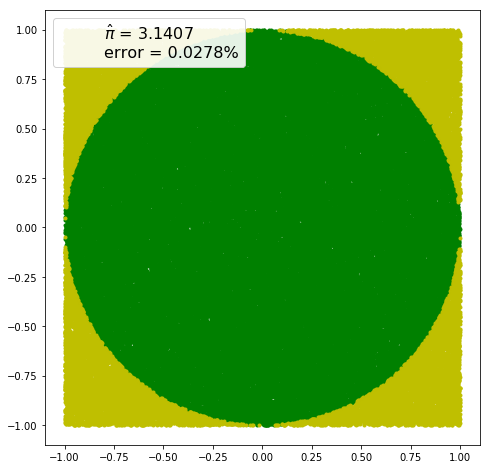

In [20]:
mc_pi_aprox(N=100000)


<h3 id="doubleintegral">DOUBLE INTEGRAL</h3>

<p>when res = 1000 the integral is a sum of one million parts, the rule of double integral and triple is the derivation through one-dimensional integrals</p>

<img src="11.PNG" /> </div>
<img src="12.PNG" /> </div>

<p>using the midpoint method we get the following</p>

<img src="13.PNG" /> </div>

<p>reaching the composite midpoint for an integral double</p>

<img src="14.PNG" /> </div>

<h4 id="exampleofthedoubleintegraloftheareaofarectangleandacircle">EXAMPLE OF THE DOUBLE INTEGRAL OF THE AREA OF A RECTANGLE AND A CIRCLE</h4>

In [21]:
import numpy as np

def MonteCarlo_double(f, g, x0, x1, y0, y1, n):
    # Draw n**2 random points in the rectangle
    x = np.random.uniform(x0, x1, n)
    y = np.random.uniform(y0, y1, n)
    # Compute sum of f values inside the integration domain
    f_mean = 0
    num_inside = 0   # number of x,y points inside domain (g>=0)
    for i in range(len(x)):
        for j in range(len(y)):
            if g(x[i], y[j]) >= 0:
                num_inside += 1
                f_mean += f(x[i], y[j])
    f_mean = f_mean/float(num_inside)
    area = num_inside/float(n**2)*(x1 - x0)*(y1 - y0)
    return area*f_mean

def test_MonteCarlo_double_rectangle_area():
    def g(x, y):
        return (1 if (0 <= x <= 2 and 3 <= y <= 4.5) else -1)

    x0 = 0;  x1 = 3;  y0 = 2;  y1 = 5  # embedded rectangle
    n = 1000
    np.random.seed(8)      # must fix the seed!
    I_expected = 3.121092  # computed with this seed
    I_computed = MonteCarlo_double(
        lambda x, y: 1, g, x0, x1, y0, y1, n)
    assert abs(I_expected - I_computed) < 1E-14

def test_MonteCarlo_double_circle_r():
   #"""Check the integral of r over a circle with radius 2."""
    def g(x, y):
        xc, yc = 0, 0  # center
        R = 2          # radius
        return  R**2 - ((x-xc)**2 + (y-yc)**2)

    # Exact: integral of r*r*dr over circle with radius R becomes
    # 2*pi*1/3*R**3
    import sympy
    r = sympy.symbols('r')
    I_exact = sympy.integrate(2*sympy.pi*r*r, (r, 0, 2))
    print ("Exact integral:", I_exact.evalf())
    x0 = -2;  x1 = 2;  y0 = -2;  y1 = 2
    n = 1000
    np.random.seed(6)
    I_expected = 16.7970837117376384  # Computed with this seed
    I_computed = MonteCarlo_double(
        lambda x, y: np.sqrt(x**2 + y**2),
        g, x0, x1, y0, y1, n)
    print ("MC approximation %d samples): %.16f" % (n**2, I_computed))
    assert abs(I_expected - I_computed) < 1E-15

if __name__ == '__main__':
    test_MonteCarlo_double_rectangle_area()
    test_MonteCarlo_double_circle_r()

Exact integral: 16.7551608191456
MC approximation 1000000 samples): 16.7970837117376384


<h3 id="exampleofnormalmc">Example of normal MC</h3>

In [22]:
from scipy.stats import norm
def integrand(y, x):
    # print "y: %s  x: %s" % (y,x)
    return (du(y)*measurment_outcome_belief(x, 3)(y))*fv_belief(item.mean, item.var)(x)
    return dblquad(
        integrand, norm.ppf(0.001, item.mean, item.var), 
        norm.ppf(0.999, item.mean, item.var),
        lambda x: norm.ppf(0.001, x, 3), 
        lambda x: norm.ppf(0.999, x, 3))[0]

<p>the integration of monte carlo into a complex form and we need to determine the area within the desired shape, assuming the number of points we want to approximate is proportional to the total number of points multiplied by the total area of the rectangle.</p>


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p>In this example, the following function is defined</p>

<img src="10.png" /> </div>

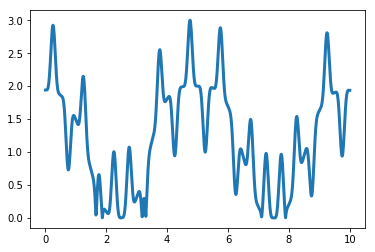

In [24]:
x = np.linspace(0,10,1001)

f = lambda x: np.abs(np.sin(2* np.pi * x) ** 5 - 2 *\
                     np.cos(3 * np.cos(x / np.pi) ** 2) ** 3)

plt.figure()
plt.plot(x, f(x), linewidth=3)
plt.show()

<p>We estimate our integral by determining the number of points that exist under the curve</p>

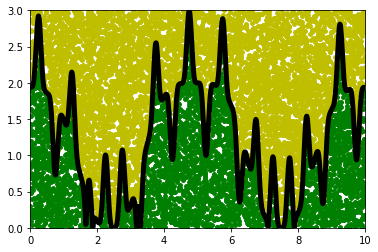

Integral estimate: 12.39


In [25]:
# Define number of samples
N = 10000

# Define rectangle boundaries
rec_x = [0, 10]
rec_y = [0, 3]
# Sample from uniform distribution
mc_x = np.random.uniform(min(rec_x), max(rec_x), N)
mc_y = np.random.uniform(min(rec_y), max(rec_y), N)

# Define the points under the curve
points_under = [True if mc_y[i] <= f(mc_x[i]) else False 
                for i in range(len(mc_x))]

# Plot the points
plt.figure()
plt.plot(x, f(x), linewidth=5, c='k')
plt.scatter(mc_x[points_under], mc_y[points_under],
           c='g', s=15)
plt.scatter(mc_x[np.logical_not(points_under)], 
            mc_y[np.logical_not(points_under)], 
            c='y', s=15)
plt.xlim(rec_x)
plt.ylim(rec_y)
plt.show()

# Calculate integral
integral = ((max(rec_x) - min(rec_x)) * 
            (max(rec_y) - min(rec_y)) * sum(points_under) / N)
print("Integral estimate: %.2f" %integral)

<p>We increase the sample quantity to improve the performance</p>

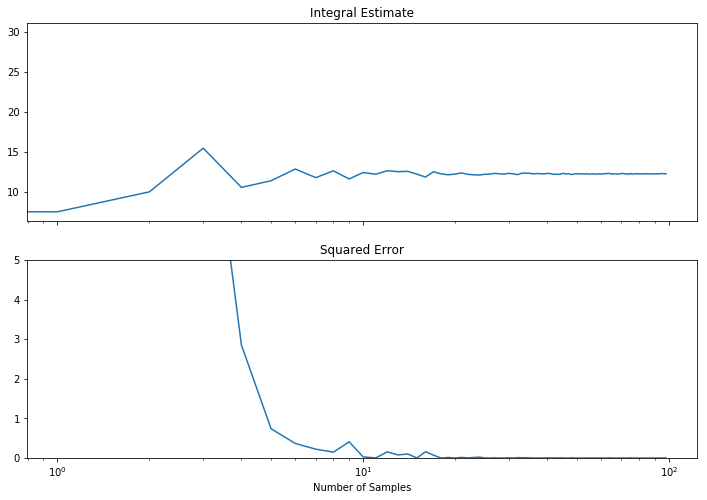

Integral estimate: 12.26


In [26]:
x = np.linspace(0,10,1001)

# Define number of samples
N = np.arange(1, 100) ** 3

# Define rectangle boundaries
rec_x = [0, 10]
rec_y = [0, 3]

int_approx = []
error = []
actual_value = 12.25
# Define the points under the curve
for n in N:
    # Sample from uniform distribution
    mc_x = np.random.uniform(min(rec_x), max(rec_x), n)
    mc_y = np.random.uniform(min(rec_y), max(rec_y), n)
    
    points_under = [True if mc_y[i] <= f(mc_x[i]) else False 
                for i in range(n)]
    # Calculate integral
    integral = ((max(rec_x) - min(rec_x)) * 
            (max(rec_y) - min(rec_y)) * sum(points_under) / n)
    int_approx.append(integral)
    
    # Calculate error
    error.append(np.power(integral - actual_value, 2))

fig, ax = plt.subplots(2, sharex=True, figsize=(12,8))
ax[0].plot(int_approx)
ax[0].set_title("Integral Estimate")
ax[1].plot(error)
ax[1].set_title("Squared Error")
ax[1].set_xlabel("Number of Samples")
ax[1].set_ylim([0, 5])
plt.xscale('log')
plt.show()

print("Integral estimate: %.2f" %int_approx[-1])

<p>depending on the amount of sample is determinant to determine the result in an efficient way</p>

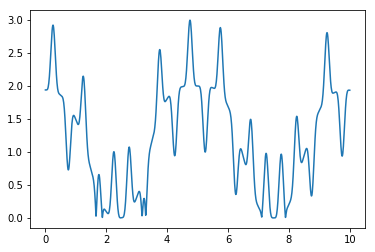

In [27]:
def f(x):
    return np.abs(np.sin(2* np.pi * x) ** 5 - 2 *\
                     np.cos(3 * np.cos(x / np.pi) ** 2) ** 3)

x = np.linspace(0, 10, 1000)
plt.figure()
plt.plot(x, f(x))
plt.show()

<p>where the integration defined from expressing the uniform distribution and the normal distribution could be obtained</p>

In [28]:
from scipy import stats

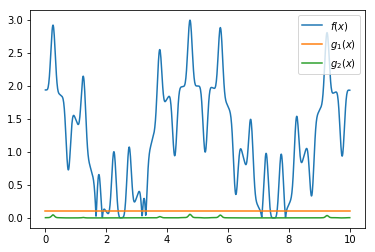

In [29]:
plt.figure()
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, stats.uniform(0,10).pdf(f(x)),
        label=r'$g_1(x)$')
plt.plot(x, stats.norm(loc =5).pdf(f(x)),
        label=r'$g_2(x)$')
plt.legend(loc='best')
plt.show()

<p>We use the values of the uniform and normal distribution to estimate the integral of our integral, where with the normal distribution it shows less in the tails and more in the center, managing to reduce our variance and therefore converer to the true value</p>

In [30]:
def w(x, a=0, b=10, mu=5, sigma=1):
    return (stats.uniform(a, b).pdf(x) /
            stats.norm(loc=mu, scale=sigma).pdf(x))

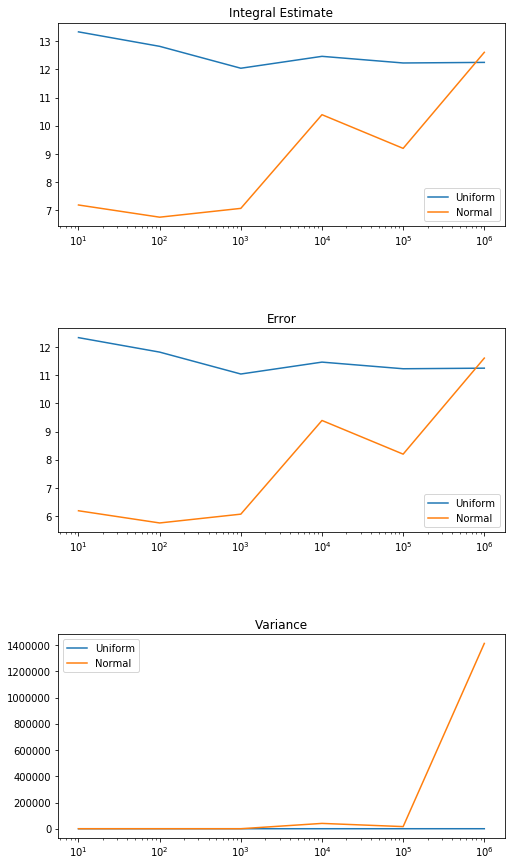

In [31]:
a = 0
b = 10
mu = 5
sigma = 1
est = []
error = []
variance = []
n_samples = []
for i in range(1, 7):
    n = int(10**i)
    
    # Uniform distribution
    X = stats.uniform(a, b).rvs(n)
    Y = (b - a) * f(X)
    est_un = np.mean(Y)
    error_un = np.abs(1 - est_un)
    var_un = np.var(Y)
    
    # Normal distribution
    X = stats.norm(loc=mu, scale=sigma).rvs(n)
    Y = (b - a) * w(X) * f(X)
    est_norm = np.mean(Y)
    error_norm = np.abs(1 - est_norm)
    var_norm = np.var(Y)
    
    est.append([est_un, est_norm])
    error.append([error_un, error_norm])
    variance.append([var_un, var_norm])
    
    n_samples.append(n)
    
est = np.array(est)
error = np.array(error)
variance = np.array(variance)
results = np.dstack([est, error, variance])

labels = ["Integral Estimate", "Error", "Variance"]
distributions = ["Uniform", "Normal"]
plt.figure(figsize=(8,15))
for i, lab in enumerate(labels):
    plt.subplot(3, 1, i + 1)
    for j, dist in enumerate(distributions):
        plt.plot(n_samples, results[:,j,i], label=dist)
        
    plt.xscale('log')
    plt.legend(loc='best')
    plt.title(lab)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()

<h3 id="exampleofthedoubleintegralofmc">Example of the double integral of MC</h3>

<p>In this case we will implement a variation of the previous function</p> 

$ f(x)\quad =\quad \int _{ 3 }^{ 28 }{ \int _{ -20 }^{ 20 }{ { sin(2\pi x) }^{ 5 } }  } -2{ 3cos\left( \frac { y }{ \pi  }  \right)  }^{ 3 }dxdy $


In [32]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
from matplotlib import cm
import numpy as np
import random
import math

valor_real=6185

In [33]:
# METHODS

def FXY(ri,a,b,c,d):
    x=(b-a)*ri+a
    y=(d-c)*ri+c
    return 5*np.abs(np.sin(2* np.pi * x) ** 5 - 2 *\
                     np.cos(3 * np.cos(y / np.pi) ** 2) ** 3)
    
def integral_doble(a,b,c,d):
    suma = 0.0
    ri = 0.0
    
    global N
    for i in range(N):
        ri = random.random()
        suma+=FXY(ri,a,b,c,d)
        
        error= (b-a) * (d-c) * math.sqrt((math.pow(valor_real,2)-suma)/N)
        total_errores.append(error)
        
        if(error<7):
            N=len(total_errores)
            break;
            
    res = (((b-a))*((d-c))*suma)/N
    return res


In [34]:
# APPROXIMATION OF THE AREA

N=10000000
total_errores=[]
res = integral_doble(3,28,-20,20)
print("ERROR: ",res)


ERROR:  6116.498288031435


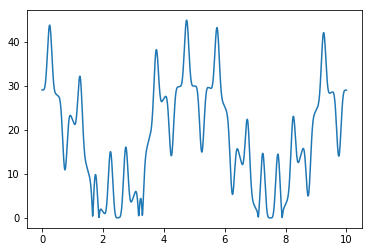

In [35]:
def f(x):
    return 15*np.abs(np.sin(2* np.pi * x) ** 5 - 2 *\
                     np.cos(3 * np.cos(x / np.pi) ** 2) ** 3)

x = np.linspace(0, 10, 1000)
plt.figure()
plt.plot(x, f(x))
plt.show()

<IPython.core.display.Javascript object>


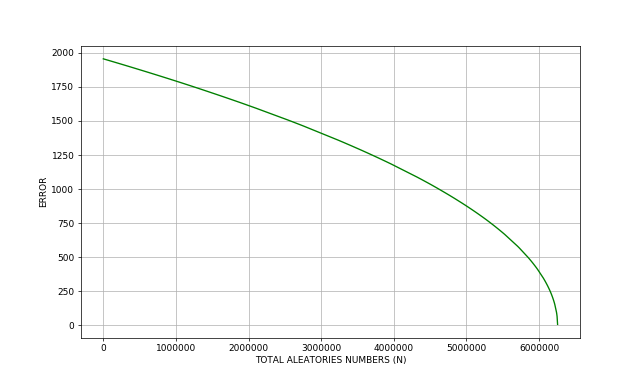

In [39]:
# Error estimation

fig, axes = pp.subplots(1, 1, figsize=(10, 6))
x=np.arange(0,len(total_errores),1)
pp.plot(x, total_errores,"green")
pp.ylabel('ERROR')
pp.xlabel('TOTAL ALEATORIES NUMBERS (N)')
pp.title('')
pp.grid(True)    
pp.show()

<IPython.core.display.Javascript object>


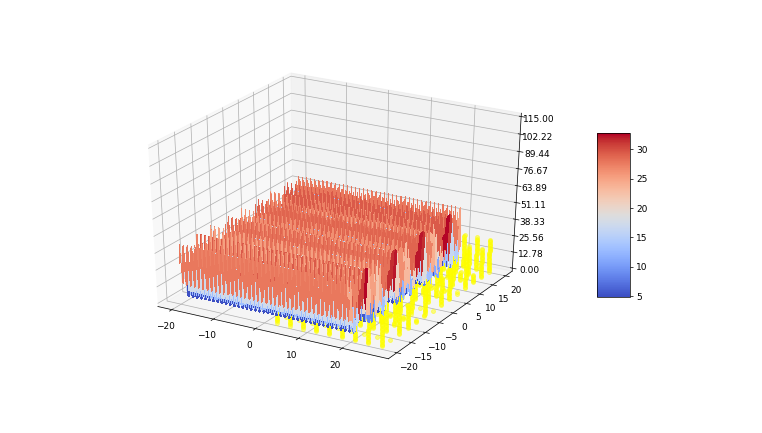

In [40]:
# 3D resolution

%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 15*np.abs(np.sin(2* np.pi *X) ** 5 - 2 *\
                     np.cos(3 * np.cos(Y / np.pi) ** 2) ** 3)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0., 115)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

for Xi in range(3, 28, 3):
    for Yi in range(-20, 20, 3):
        Zi = 15*np.abs(np.sin(2* np.pi * Xi) ** 5 - 2 *\
                     np.cos(3 * np.cos(Yi / np.pi) ** 2) ** 3)
        if (Zi >= 0):
            for i in range(0, int(Zi), 1):
                ax.scatter(Xi, Yi, i, marker="o", color="yellow",alpha=0.5)
        
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<h3 id="referencias">Referencias</h3>

<ul>
<li>http://people.duke.edu/~ccc14/sta-663-2016/15C_MonteCarloIntegration.html</li>

<li>https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html</li>

<li>http://www.cs.toronto.edu/~guerzhoy/180/lectures/W10/lec2/MonteCarloInt.html</li>

<li>https://tresenrayablog.wordpress.com/2015/03/08/python-para-economistas-simulacion-montecarlo-estimar-pi/</li>

<li>https://www.datahubbs.com/integrating-casino-monte-carlo-integration/</li>

<li>https://link.springer.com/chapter/10.1007/978-3-319-32428-9_3</li>
</ul>
